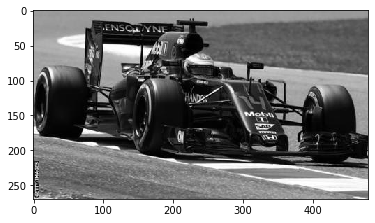

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
DATADIR ="C:/Tensorflow1/models/research/object_detection/Dataimages"
CATEGORIES = ["f1","NotF1"]

for category in CATEGORIES:  # every f1 and NonF1 cars
    path = os.path.join(DATADIR,category)  # create path to f1 and Nonf1 cars
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break 
    break 

In [10]:
print(img_array.shape)

(270, 480)


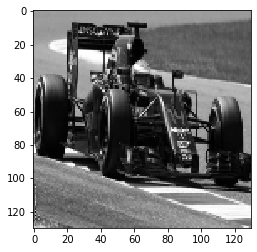

In [18]:
IMG_SIZE = 130

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [22]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in os.listdir(path):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:

create_training_data()

In [23]:
print(len(training_data))

198


In [31]:
import random

random.shuffle(training_data)

In [32]:
for sample in training_data[:10]:
    print(sample[1])

0
1
0
1
1
0
1
0
1
0


In [36]:
X = []
y = []
for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[29]
   [32]
   [34]
   ...
   [26]
   [28]
   [13]]

  [[29]
   [32]
   [36]
   ...
   [25]
   [44]
   [19]]

  [[31]
   [34]
   [35]
   ...
   [27]
   [60]
   [28]]

  ...

  [[26]
   [26]
   [28]
   ...
   [ 0]
   [ 3]
   [ 1]]

  [[27]
   [29]
   [30]
   ...
   [ 0]
   [ 1]
   [ 2]]

  [[27]
   [28]
   [30]
   ...
   [ 7]
   [ 8]
   [ 9]]]]


In [37]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [38]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=40, epochs=10, validation_split=0.20)

In [ ]:
from tensorflow.keras.callbacks import TensorBoard
NAME = "F1 identification CNN"